In [1]:
import requests
import datetime
import json
import csv
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback
import logging
import seaborn as sns
from pandas.io.json import json_normalize
%matplotlib inline

import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.stdout = default_stdout
sys.stderr = default_stderr
sys.setdefaultencoding('utf-8')

In [2]:
def check_connect_output_json(url_address):
    limit_retry_number = 20
    for i in range(limit_retry_number):
        try :
            r = requests.get(url_address)
            if r.status_code == 200:
                r.encoding = "utf-8"
                jsondata = r.json()
                break
            else:
                print "retry ",i," times! 5sec between and retry only 20 times."
                print "else sleep"
                time.sleep(5)
        except (KeyboardInterrupt, SystemExit):
            raise
        except Exception as e:
            print "retry ",i," times! 5sec between and retry only 20 times."
            print "except sleep"
            time.sleep(5)
        if i == 20:
            return {"this url":{"is bad"}}
    return jsondata

def get_page_posts_to_df(url):
    
    jsondata = check_connect_output_json(url)['posts']
    frames = []
    # 只要有分頁連結就一直往下
    x=0
    while 'paging' in jsondata:
        x +=1
        temp=json_normalize(jsondata['data'])
        frames.append(temp)
        newurl = jsondata['paging']['next']
        newr= requests.get(newurl)
        newr.encoding="utf-8"
        jsondata = newr.json()
        print x

        #若超過200個分頁就先暫停
        if x==200:
            break
    testdf = pd.concat(frames,ignore_index=True)
    testdf = testdf.drop(testdf.ix[:,[0,7]],axis =1)
    testdf.columns= ['comments','create_time','id','link','message','name','reactions','shares','type'];
    testdf.create_time =pd.to_datetime(testdf.create_time,format= "%Y-%m-%dT%H:%M:%S+0000")
    testdf=testdf[['id','create_time','name','message','type','link','comments','reactions','shares']]
    print "done"
    return testdf

In [3]:
def fb_pages_info(page_id):
    # 選API版本預設2.8
    fb_graph_api = "https://graph.facebook.com/v2.8/"
    # 放粉絲頁ID
    nodes = page_id
    # access_token
    app_id = "393833577650615"
    app_secret = "3ab280dac70995e4d8e601cbc025b53a"
    access_token = "access_token="+app_id + "|" + app_secret
    # 所要看的欄位
    fields ="""/?fields=posts{id,name,link,message,shares,created_time,type,comments.limit(0).summary(total_count),reactions.limit(0).summary(total_count)}""" 
    # 把url連接整理好丟出去
    url = fb_graph_api+nodes+fields+"&"+access_token
    # status_id_url_end = fields+"&"+access_token
#     print url
    return url



In [7]:
page_id_list = ['YaoTurningTaipei','DoctorKoWJ','appledaily.tw',"gamer.com.tw","cookierunzh"]

page_id = "cookierunzh"

url = fb_pages_info(page_id)

datadf = get_page_posts_to_df(url)


1
2
3
4
done


In [14]:

# datadf.to_csv(page_id+'.csv',index=False)

In [10]:
# thdf=datadf.ix[30:50,:].copy().reset_index(drop=True)

In [4]:
datadf = 

NameError: name 'datadf' is not defined

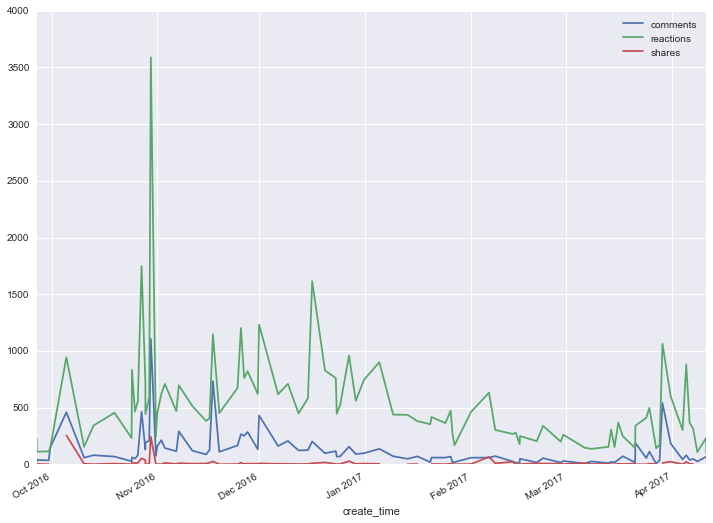

In [19]:
datadf.plot(x="create_time",figsize=(12,9))

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      __builtin__.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner and increases to the right.
 |      
 |      
 |      If *numRows* <= *numCols* <= *plotNum* < 10, *args* can be the
 |      decimal integer *numRows* * 100 + *numCols* * 10 + *plotNum*.
 |  
 |  __reduce__(self)
 |  
 |  c

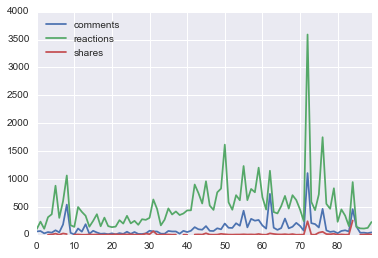